# NLP_HW3
YUEYANG LIU
1/31/2019

## Cleaning House (40 points)

Write a function that takes in a vector like reviews above, and corrects the errors like we saw above. In essence, each entry of the vector text above should only contain one entry.  
Luckily, we can exploit the fact that the first entry should always be a number. If we do not see a number in the first comma-separated entry, we know the list entry is a text segment.  
I’ll supply the function signature and some variables you should use:

In [0]:
import re
#function review_cleaner 
# Cleans malformed car review entries 
# # inputs:
# review_list, a list of comma-separated data 
# corresponding to user reviews and ratings 
# (some malformed) 
# output:
# cleaned_list, removes the malformed data
def review_cleaner(input_text):
# this will be the output list 
  cleaned_list = []
  cleaned_list.append(input_text[0])#keep the col name
  for i in range(1,len(input_text)):
    if re.match("^(\d,\D)",input_text[i]):
      remove_index=re.sub("","",input_text[i])
      cleaned_list.append(remove_index)
    else:
      if len(cleaned_list):#第一行就不符合条
        cleaned_list[-1]=cleaned_list[-1]+input_text[i]
# if first comma-separated entry is a number, 
# append to cleaned_list
# if first comma-separated entry is not a number, 
# remove newline character, append to previous 
# cleaned_list entry
  return cleaned_list


In [0]:
#Auto one deep input 
#Find all need are in the same path of the notebook!
#input: folder path, doc format(string)
#output: dictionary[file_name:path]
import os
def find_file(file_format,file_path):



  out_file_path={}
  filelist=os.listdir(file_path)
  for i in filelist:
    if i.endswith(file_format):  
      name=i.rstrip('.'+file_format)
      out_file_path[name]=i
  #print (out_file_path)
  return out_file_path




In [0]:
#Write function
def read_old(out_file_path):
  for i in out_file_path:
    with open(out_file_path[i],'r', encoding="utf8") as f:
      text = f.readlines()
    cleaned=review_cleaner(text)
    #print(cleaned[1:3])
    cleaned_str = "".join(cleaned)
    filename = i+"_clean.csv"
    with open(filename, 'w') as f:
      f.write(cleaned_str)





Find and read data


In [0]:
dic=find_file("csv",".")
#long time to run
read_old(dic)

In [0]:
import pandas as pd
import matplotlib.pyplot as plt


def fix_data(clean_df):
  new = clean_df['Review_Date'].str.split(" ", n = 4, expand = True)  
  clean_df['Review_Date'] =  pd.to_datetime(new[2], format='%m/%d/%y')
  clean_df['lengths'] = emp_df['Review'].str.len()
  return clean_df
    
    
def plot_pic(input_list):
  for i in input_list:
    emp_df = pandas.read_csv(input_list[i])
    emp_df=fix_data(emp_df)
    grouped=emp_df.groupby(emp_df['Review_Date'].dt.year)
    df_len = emp_df.groupby(emp_df['Review_Date'].dt.year)['lengths'].mean()
    df_count = emp_df.groupby(emp_df['Review_Date'].dt.year)['Review'].count()
    df_rate = emp_df.groupby(emp_df['Review_Date'].dt.year)['Rating'].mean()
    df_len.plot.bar(title=i+" VS length")
    plt.tight_layout()
    plt.show()     

    df_count.plot.bar(title=i+" VS review num")
    plt.tight_layout()
    plt.show()     

    df_rate.plot.bar(title=i+" VS Rate")
    plt.tight_layout()
    plt.show()     



## Summary Statistics (30 points)

For each car make, please generate the following statistics and present them using a bar chart.

- The number of reviews per year

- The average car rating per year

- The average length of review per year




Read new data,plot

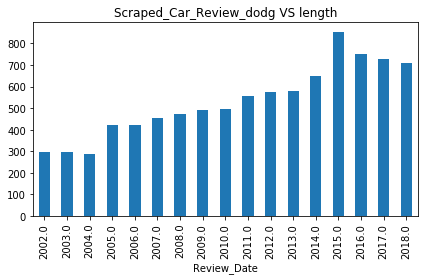

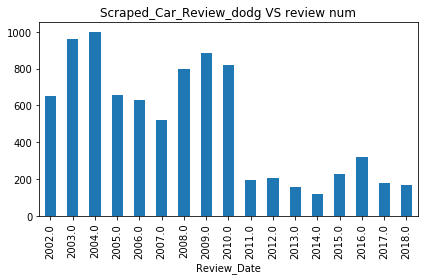

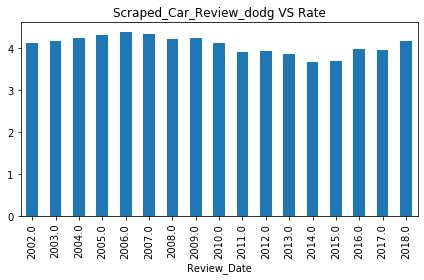

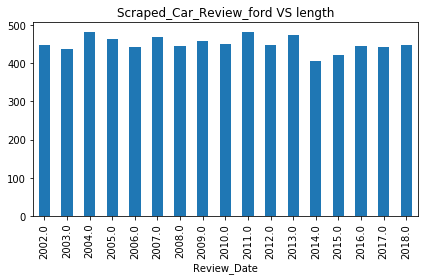

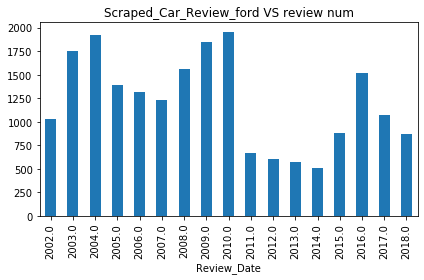

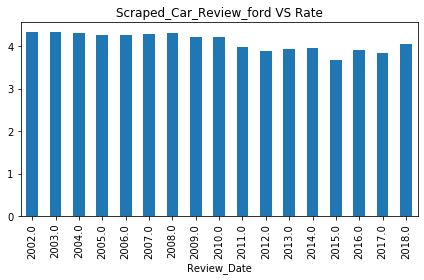

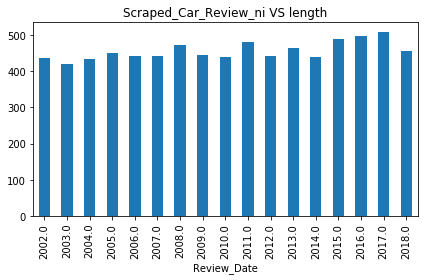

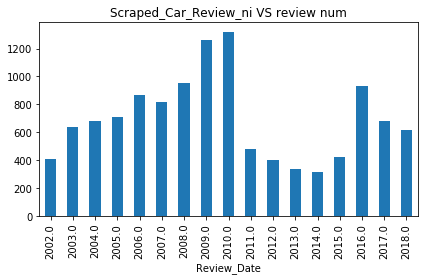

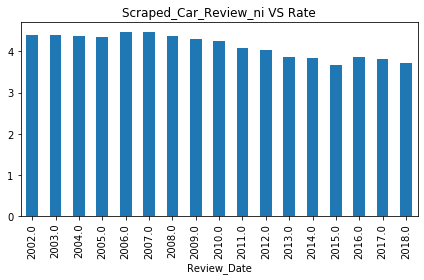

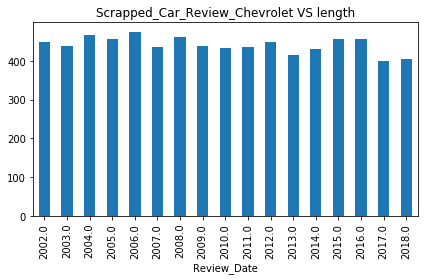

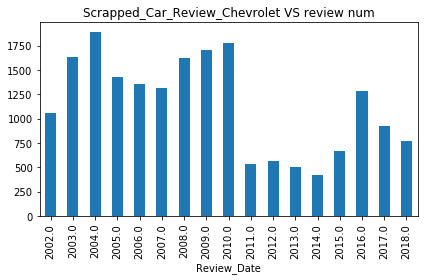

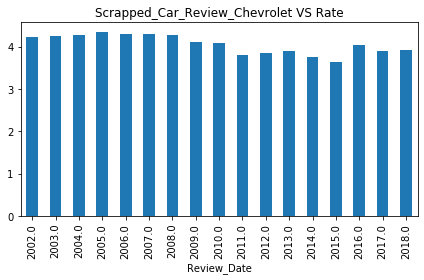

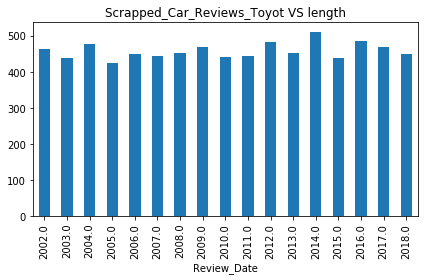

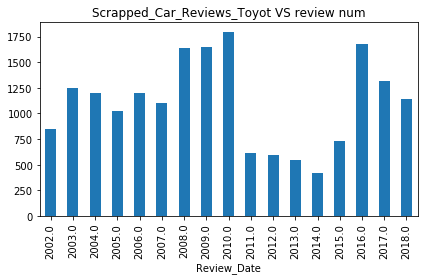

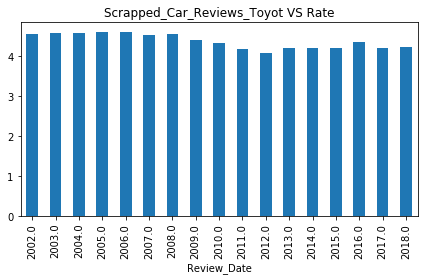

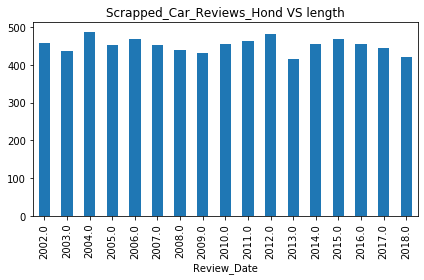

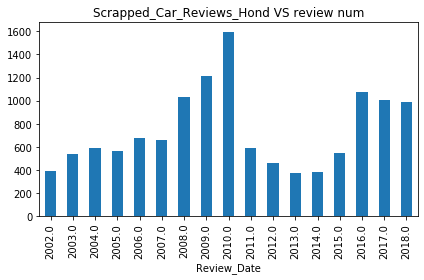

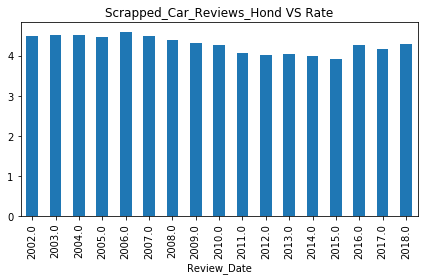

In [421]:
dic=find_file("_clean.csv",".")
plot_pic(dic)

## Punctionations, Reviews, and Hypotheses (30 points)

Required Reading: 9.1: Comparison of Two Population Means: Large, Independent Samples. Note: There is a typo in this article: x−1 and x-2 is supposed to read x 1 and x 2 (i.e., the mean of samples 1 and 2). This should also be apparent from the text.  
Across *all* car makes, models and years, find all the reviews which use the exclamation mark at least once. Our hypothesis is that this is excitement, and hopefully this translates to better car ratings. Since we are scientists, we need to use proper statistical theory to see if this is the case (i.e., use statistical hypothesis testing). Test at the 1% level of significance whether the data provides sufficient evidence to conclude that car reviews with exclamation marks h ave higher ratings than car reviews that do not.


In [427]:
from scipy.stats import ttest_ind


def simp_ttest(input_list):
  cat1=pd.DataFrame()
  cat2=pd.DataFrame()
  for i in input_list:
    emp_df = pandas.read_csv(input_list[i])
    emp_df=fix_data(emp_df)
#check row include ！
    emp_df["Category"] = emp_df['Review'].str.contains(r'(!)')
    cat1 =cat1.append( emp_df[emp_df['Category']==True],ignore_index=True)
    cat2 =cat2.append(emp_df[emp_df['Category']==False],ignore_index=True)
    #print(cat1.shape)
  p_val=ttest_ind(cat1['Rating'], cat2['Rating'],equal_var=False,nan_policy='omit')[1]
  return p_val

simp_ttest(dic)





/usr/local/lib/python3.6/dist-packages/pandas/core/strings.py:1843: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


1.5431961453847454e-07

P value is small , there are have different between 2group